In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df=pd.DataFrame()
df['reviews'] = reviews
df.head()

,reviews
0,Not Verified | Prior to boarding a gate agent...
1,✅ Trip Verified | I flew from Amsterdam to L...
2,"✅ Trip Verified | First the good news, the clu..."
3,✅ Trip Verified | I have never travelled wit...
4,"✅ Trip Verified | Terrible overall, medium ser..."


In [7]:
df.shape

(1000, 1)

In [5]:
df.to_csv('british_airways_reviews.csv', index=False)

In [8]:
import nltk

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import string
import re

In [16]:
stopwords=nltk.corpus.stopwords.words('english')

In [18]:
ps=nltk.PorterStemmer()

In [19]:
def clean(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

df['cleaned_text']=df['reviews'].apply(lambda x: clean(x))
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
C:\Users\rutur\AppData\Local\Temp\ipykernel_17220\4038600493.py:3: SyntaxWarning: invalid escape sequence '\W'
  tokens=re.split('\W',text)


,reviews,cleaned_text
0,Not Verified | Prior to boarding a gate agent...,"[verifi, , , prior, board, gate, agent, seem, ..."
1,✅ Trip Verified | I flew from Amsterdam to L...,"[, , trip, verifi, , , , flew, amsterdam, la, ..."
2,"✅ Trip Verified | First the good news, the clu...","[, , trip, verifi, , first, good, news, club, ..."
3,✅ Trip Verified | I have never travelled wit...,"[, , trip, verifi, , , , never, travel, britis..."
4,"✅ Trip Verified | Terrible overall, medium ser...","[, , trip, verifi, , terribl, overal, medium, ..."


In [27]:
df['length']=df['reviews'].apply(lambda x:len(x)-x.count(" "))
def count_puctutaion(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

df['pun_percent']=df['reviews'].apply(lambda x:count_puctutaion(x))
df.head()

,reviews,cleaned_text,length,pun_percent
0,Not Verified | Prior to boarding a gate agent...,"[verifi, , , prior, board, gate, agent, seem, ...",1124,1.3
1,✅ Trip Verified | I flew from Amsterdam to L...,"[, , trip, verifi, , , , flew, amsterdam, la, ...",2101,1.7
2,"✅ Trip Verified | First the good news, the clu...","[, , trip, verifi, , first, good, news, club, ...",619,1.9
3,✅ Trip Verified | I have never travelled wit...,"[, , trip, verifi, , , , never, travel, britis...",557,1.4
4,"✅ Trip Verified | Terrible overall, medium ser...","[, , trip, verifi, , terribl, overal, medium, ...",199,2.5


In [48]:
df['verified']=df['reviews'].str.lower().str.contains("trip verified")
df.head()

,reviews,cleaned_text,length,pun_percent,verified
0,Not Verified | Prior to boarding a gate agent...,"[verifi, , , prior, board, gate, agent, seem, ...",1124,1.3,False
1,✅ Trip Verified | I flew from Amsterdam to L...,"[, , trip, verifi, , , , flew, amsterdam, la, ...",2101,1.7,True
2,"✅ Trip Verified | First the good news, the clu...","[, , trip, verifi, , first, good, news, club, ...",619,1.9,True
3,✅ Trip Verified | I have never travelled wit...,"[, , trip, verifi, , , , never, travel, britis...",557,1.4,True
4,"✅ Trip Verified | Terrible overall, medium ser...","[, , trip, verifi, , terribl, overal, medium, ...",199,2.5,True


In [51]:
counts = df["verified"].value_counts()

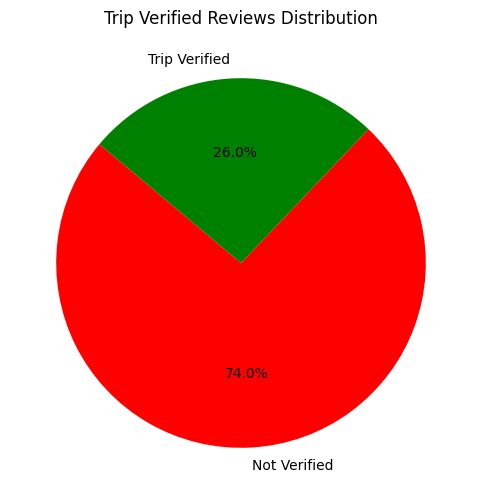

In [52]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=["Not Verified", "Trip Verified"], autopct="%1.1f%%", colors=["red", "green"], startangle=140)
plt.title("Trip Verified Reviews Distribution")
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

In [31]:
tfid=TfidfVectorizer(analyzer=clean)
x_tfid=tfid.fit_transform(df['reviews'])

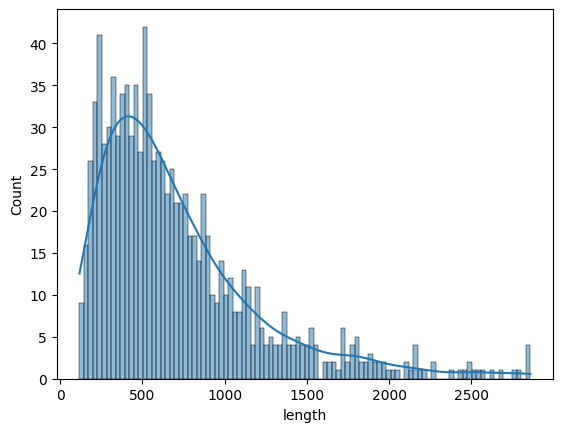

In [32]:
sns.histplot(df['length'],kde=True,bins=100)
plt.show()

In [34]:
x_features=pd.concat([df['length'],pd.DataFrame(x_tfid.toarray())],axis=1)
x_features.columns = x_features.columns.astype(str)
x_features.head()

,length,0,1,2,3,4,5,6,7,8,...,5879,5880,5881,5882,5883,5884,5885,5886,5887,5888
0,1124,0.069240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2101,0.100262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,619,0.084477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,557,0.148026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,199,0.171786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold , cross_val_score
rf=RandomForestClassifier(n_jobs=1)
k_fold=KFold(n_splits=5)
print(cross_val_score(rf,x_features,df['verified'],cv=k_fold,scoring='accuracy',n_jobs=1))
print("Accuracy of the model is: ",cross_val_score(rf,x_features,df['verified'],cv=k_fold,scoring='accuracy',n_jobs=1).mean())
print("Standard Deviation of the model is: ",cross_val_score(rf,x_features,df['verified'],cv=k_fold,scoring='accuracy',n_jobs=1).std())

[0.96  0.99  0.945 0.97  0.94 ]
Accuracy of the model is:  0.9629999999999999
Standard Deviation of the model is:  0.011224972160321834


In [83]:
import math

In [76]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features,df['verified'],test_size=0.3,random_state=0)

In [77]:
rf=RandomForestClassifier(n_estimators=500,max_depth=20,n_jobs=-1)
rf_model=rf.fit(x_train,y_train)

In [78]:
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.1629311539654302, '5399'),
 (0.05367399892563695, '0'),
 (0.007029760685699462, '2352'),
 (0.005370541918281668, '5401'),
 (0.004793620628819861, '5684'),
 (0.0046625674239890395, '4415'),
 (0.004560935833559063, 'length'),
 (0.004253845437251591, '5637'),
 (0.004109954349231708, '5386'),
 (0.0038980973543850887, '2740')]

In [79]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support=score(y_test,y_pred,pos_label=False,average='binary')

In [80]:
print("Precison {} /Recall {}/ Accuracy {}".format(round(precision,3),
                                                   round(recall,3),
                                                   round((y_pred==y_test).sum()/len(y_pred),3)))

Precison 1.0 /Recall 0.115/ Accuracy 0.743


In [87]:
from sklearn.linear_model import LogisticRegression

In [ ]:

negative_words = {"bad", "worst", "poor", "terrible", "awful", "hate", "horrible", "disappointed"}

def get_sentiment(text):
    negative_found = [word for word in text if word in negative_words]
    if negative_found:
        return 0
    else:
        return 1
    
df['sentiment'] = df['cleaned_text'].apply(lambda x: get_sentiment(x))
df.head()
    



,reviews,cleaned_text,length,pun_percent,verified,sentiment
0,Not Verified | Prior to boarding a gate agent...,"[verifi, , , prior, board, gate, agent, seem, ...",1124,1.3,False,1
1,✅ Trip Verified | I flew from Amsterdam to L...,"[, , trip, verifi, , , , flew, amsterdam, la, ...",2101,1.7,True,1
2,"✅ Trip Verified | First the good news, the clu...","[, , trip, verifi, , first, good, news, club, ...",619,1.9,True,1
3,✅ Trip Verified | I have never travelled wit...,"[, , trip, verifi, , , , never, travel, britis...",557,1.4,True,1
4,"✅ Trip Verified | Terrible overall, medium ser...","[, , trip, verifi, , terribl, overal, medium, ...",199,2.5,True,1


In [91]:
df['sentiment'].value_counts()

sentiment
1    755
0    245
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

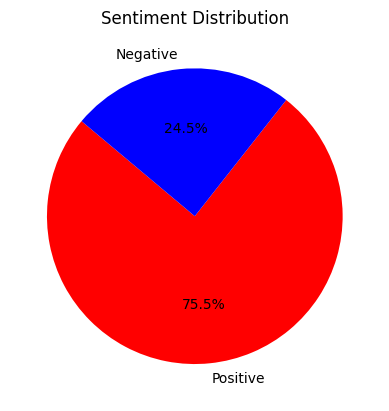

In [103]:
plt.pie(df['sentiment'].value_counts(), labels=["Positive", "Negative"], autopct="%1.1f%%",colors=['red','blue'], startangle=140)
plt.title("Sentiment Distribution")

In [94]:
x=x_features
y=df['sentiment']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [97]:
y_pred = model.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.77


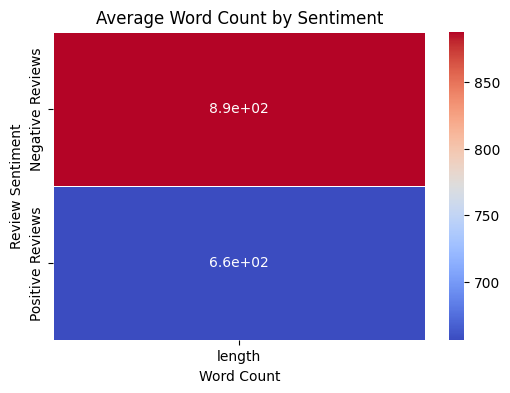

In [111]:


heatmap_data = df.pivot_table(index="sentiment", values="length", aggfunc="mean")

# Rename index for better understanding
heatmap_data.index = ["Negative Reviews", "Positive Reviews"]

# Plot Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Average Word Count by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Review Sentiment")
plt.show()